# Image classification for the MNIST dataset

In [1]:
# To use full widht of screen in the notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Import Libraries and test GPUs

We import the required libraries and check if the GPU cards are available (cuda).

In [2]:
# Import libraries
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Adam
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


## Dataset

We download the MNIST datasets for the first time and transform them tensors in order to be used by PyTorch. Afterward, when running the notebook again, the datasets are already stored locally.

In [3]:
# Define transformations
my_transform = transforms.Compose([transforms.ToTensor()])

# Load datasets
train_dataset = datasets.MNIST(root='./data', train=True, transform=my_transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=my_transform, download=True)
print(train_dataset)
print(test_dataset)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Inspect data shape
images, labels = next(iter(train_loader))
print(f"Image batch shape: {images.shape}")
print(f"Label batch shape: {labels.shape}")

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Image batch shape: torch.Size([64, 1, 28, 28])
Label batch shape: torch.Size([64])


## Data visualization

Let's print an element of the training dataset as a tensor.

In [4]:
# We set the decimal precision to 1 (or 2) only for printing purposes, i.e. to be able to visualize the matrix (tensor) similarly as the actual image
torch.set_printoptions(precision=1, linewidth=300)

# Let's check the first element as a tensor
train_dataset[0][0][0]

tensor([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.5, 0.5, 0.7, 0.1, 0.7, 1.0, 1.0, 0.5, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.4, 0.6, 0.7, 1.0, 1.0, 1.0, 1.0, 1.0, 0

We can barely distinguish the element with the naked eye. Let's check a couple more of elements (this is the first one), but now as images.

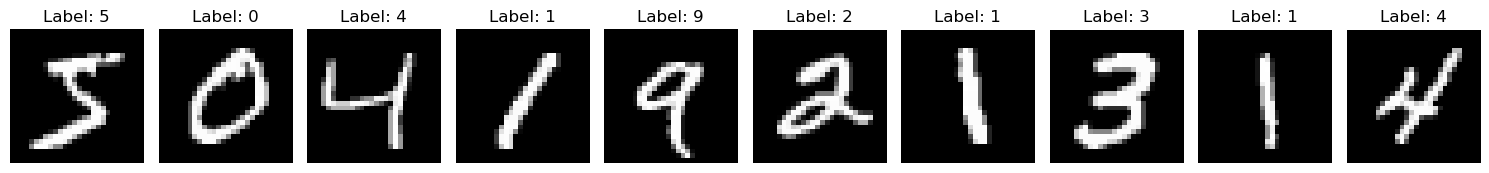

In [5]:
n_imgs=10
fig, axes = plt.subplots(1, n_imgs, figsize=(15, 4))
for i in range(n_imgs):
    ax = axes[i]
    x, y = train_dataset[i]
    image = transforms.functional.to_pil_image(x)
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {y}")
    ax.axis('off')
plt.tight_layout()
plt.show()

## Neural network and training

Now we define our neural network and start the training process.

In [6]:
# Define the neural network
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
    
    def forward(self, x):
        return self.network(x)

# Initialize model
model = MNISTModel().to(device)
print(model)

MNISTModel(
  (network): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [7]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/5], Loss: 0.3365
Epoch [2/5], Loss: 0.1377
Epoch [3/5], Loss: 0.0945
Epoch [4/5], Loss: 0.0699
Epoch [5/5], Loss: 0.0563


## Predictions and inference

Now that the model is trained we can test it.

In [8]:
def test_model(model, test_loader, device):
    model.eval()  # Set model to evaluation mode
    
    # Get a batch of test data
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)
    
    # Predict
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)
    
    # Visualize results
    n_imgs=10
    fig, axes = plt.subplots(1, n_imgs, figsize=(15, 4))
    for i in range(n_imgs):
        ax = axes[i]
        ax.imshow(images[i].cpu().squeeze(), cmap='gray')
        ax.set_title(f"Label: {labels[i].item()}\nPredicted: {predictions[i].item()}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

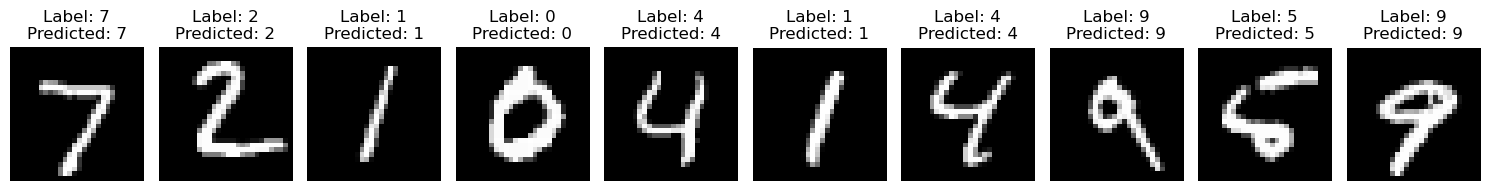

In [9]:
test_model(model, test_loader, device)